<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [397]:
data = [
        {
            "name":"A",
            "index":0,
            "next_edge":
                [
                  {"cost":1,"index_node":3},
                  {"cost":1,"index_node":1}
                ]
        },
        {
            "name":"B",
            "index":1,
            "next_edge":
               [
                {"cost":1,"index_node":2},
                {"cost":1,"index_node":4}
               ]
        },
        {
            "name":"C",
            "index":2,
            "next_edge":
              [
               
              ]
        },
        {
            "name":"D",
            "index":3,
            "next_edge":
              [
               {"cost":1,"index_node":5}
              ]
        },
        {
            "name":"D",
            "index":4,
            "next_edge":
              [
               
              ]
        },
        {
            "name":"D",
            "index":5,
            "next_edge":
              [
               
              ]
        }
       ]

In [375]:
class dfs:
  def __init__(self,data,startNode=0):
    self.__data = data
    self.__manageData()
    self.stack = []
    self.stack.append(data[startNode])
  
  def step(self):
    if(len(self.stack)>0):
      node_data = self.stack.pop();

      for edge in node_data["next_edge"]:
        next_index_node = edge["index_node"]
        next_node = self.__data[next_index_node]
        self.__updateCost(node_data,next_node,edge)
        

      return node_data
    return None
  
  def __manageData(self):
    for node in self.__data:
      node["prev_node_best"] = {}
      node["prev_node_best"] = {"index_node":-1,"best_cost":None}

  def __updateCost(self,node_data,next_node,edge):
    node_best_cost = 0
    if node_data["prev_node_best"]["best_cost"] is not None:
      node_best_cost = node_data["prev_node_best"]["best_cost"]

    if next_node["prev_node_best"]["best_cost"] is None or next_node["prev_node_best"]["best_cost"] > edge["cost"]+node_best_cost:
        next_node["prev_node_best"]["best_cost"] = edge["cost"] + node_best_cost
        next_node["prev_node_best"]["index_node"] = node_data["index"]
        self.stack.append(next_node)

  def getData(self):
    return self.__data


In [376]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

In [405]:
class Graph_DFS:
  def __init__(self,data):
    self.G=nx.DiGraph()
    self.__createGraph(data)

  def __createGraph(self,data):
    for node in data:
      for next_edge in node["next_edge"]:
        index_next_node = next_edge["index_node"]
        #next_node = data[index_next_node]
        self.G.add_edge(node["index"],index_next_node,weight=1)
        print(f"""node={node["index"]} , next={index_next_node}""")
    self.pos=nx.spring_layout(self.G) # positions for all nodes

  def drawGraph(self,index_node=-1):
    all_node = self.G.nodes
  
    if index_node != -1:
      mark_node = [index_node]
      other_node = [i for i, e in enumerate(all_node) if i != index_node]

      # nodes 
      nx.draw_networkx_nodes(self.G,self.pos,nodelist=mark_node,node_size=700,node_color='#00ff00')
      nx.draw_networkx_nodes(self.G,self.pos,nodelist=other_node,node_size=700,node_color='#0000ff')
    else:
      nx.draw_networkx_nodes(self.G,self.pos,nodelist=all_node,node_size=700,node_color='#0000ff')
    

    # labels
    nx.draw_networkx_labels(self.G,self.pos,font_size=20,font_family='sans-serif')

    
    # edges
    all_edge = self.G.edges(data=True)
    nx.draw_networkx_edges(self.G,self.pos,edgelist=all_edge,
                        arrows=True,arrowsize=20,arrowstyle='-|>')

    plt.axis('off')
    plt.show() # display
    return all_node
    

node=0 , next=3
node=0 , next=1
node=1 , next=2
node=1 , next=4
node=3 , next=5


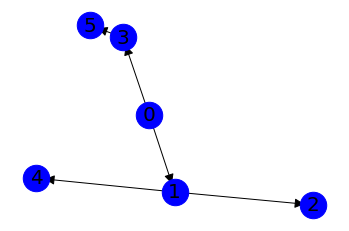

NodeView((0, 3, 1, 2, 4, 5))

In [406]:
graph = Graph_DFS(data)
graph.drawGraph()

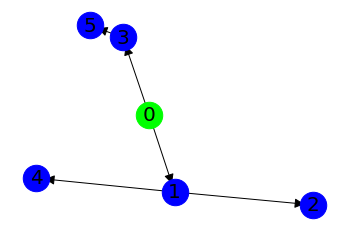

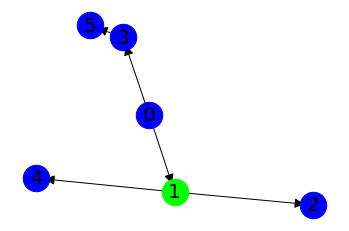

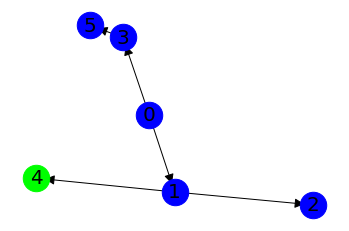

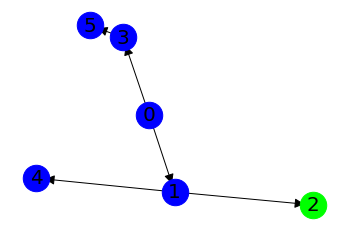

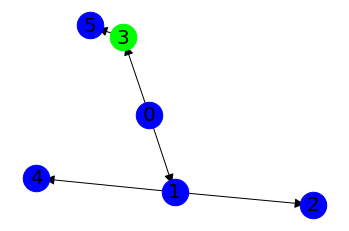

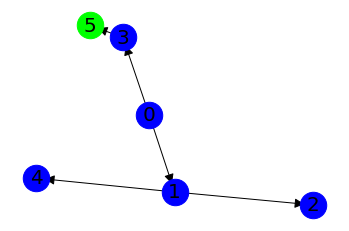

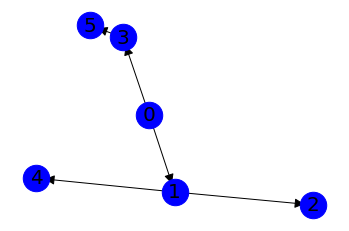

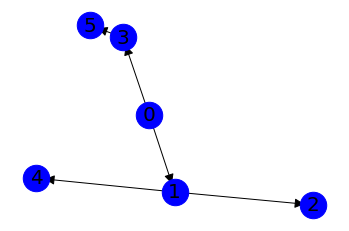

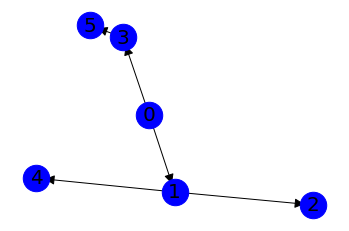

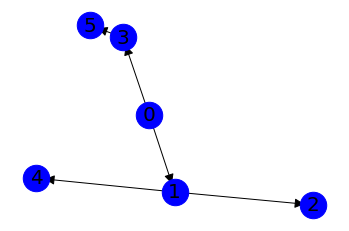

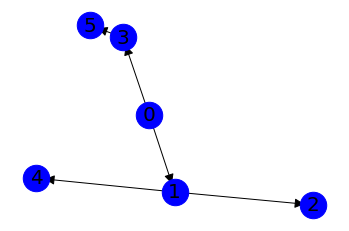

In [408]:
start_node = 0
search = dfs(data,start_node)
def update(i):
  result = search.step()
  if result is not None:
    graph.drawGraph(result["index"])
  else:
    graph.drawGraph()

# output animation; its important I save it
fig = plt.gcf()

ani = FuncAnimation(fig, update, interval=1000,frames=10)
ani.save('dfs_graph.mp4')